<a href="https://colab.research.google.com/github/jeanraisa/Sound-Clustering/blob/main/clustering_assignment_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering Unlabeled Sound Data

## Assignment

Complete the tasks in the notebook and document your observations in the markdown cells.

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:

#Make allNecessary Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import librosa
import librosa
import os
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score


In [7]:

# Load the Data
unlabelled_data_path = "/content/drive/MyDrive/unlabelled_sounds/unlabelled_sounds"

features = []
files_names = []

**Feature Extraction**

In [8]:
#Feature Extraction (Mel Spectrograms)
for file in os.listdir(unlabelled_data_path):
    if file.endswith(".wav"):
        file_path = os.path.join(unlabelled_data_path, file)
        y, sr = librosa.load(file_path)
        mel_spec = librosa.feature.melspectrogram(y=y, sr=sr)
        mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)
        features.append(np.mean(mel_spec_db, axis=1))
        files_names.append(file)

features = np.array(features)


In [9]:
# Convert the Dataframe
df = pd.DataFrame(features)

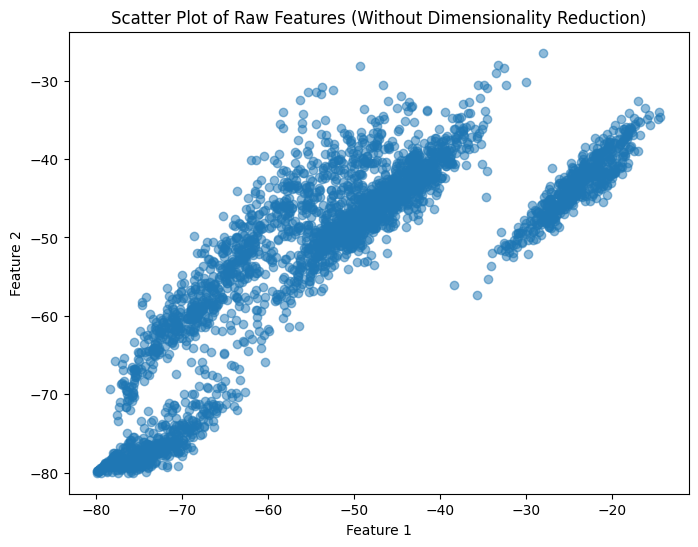

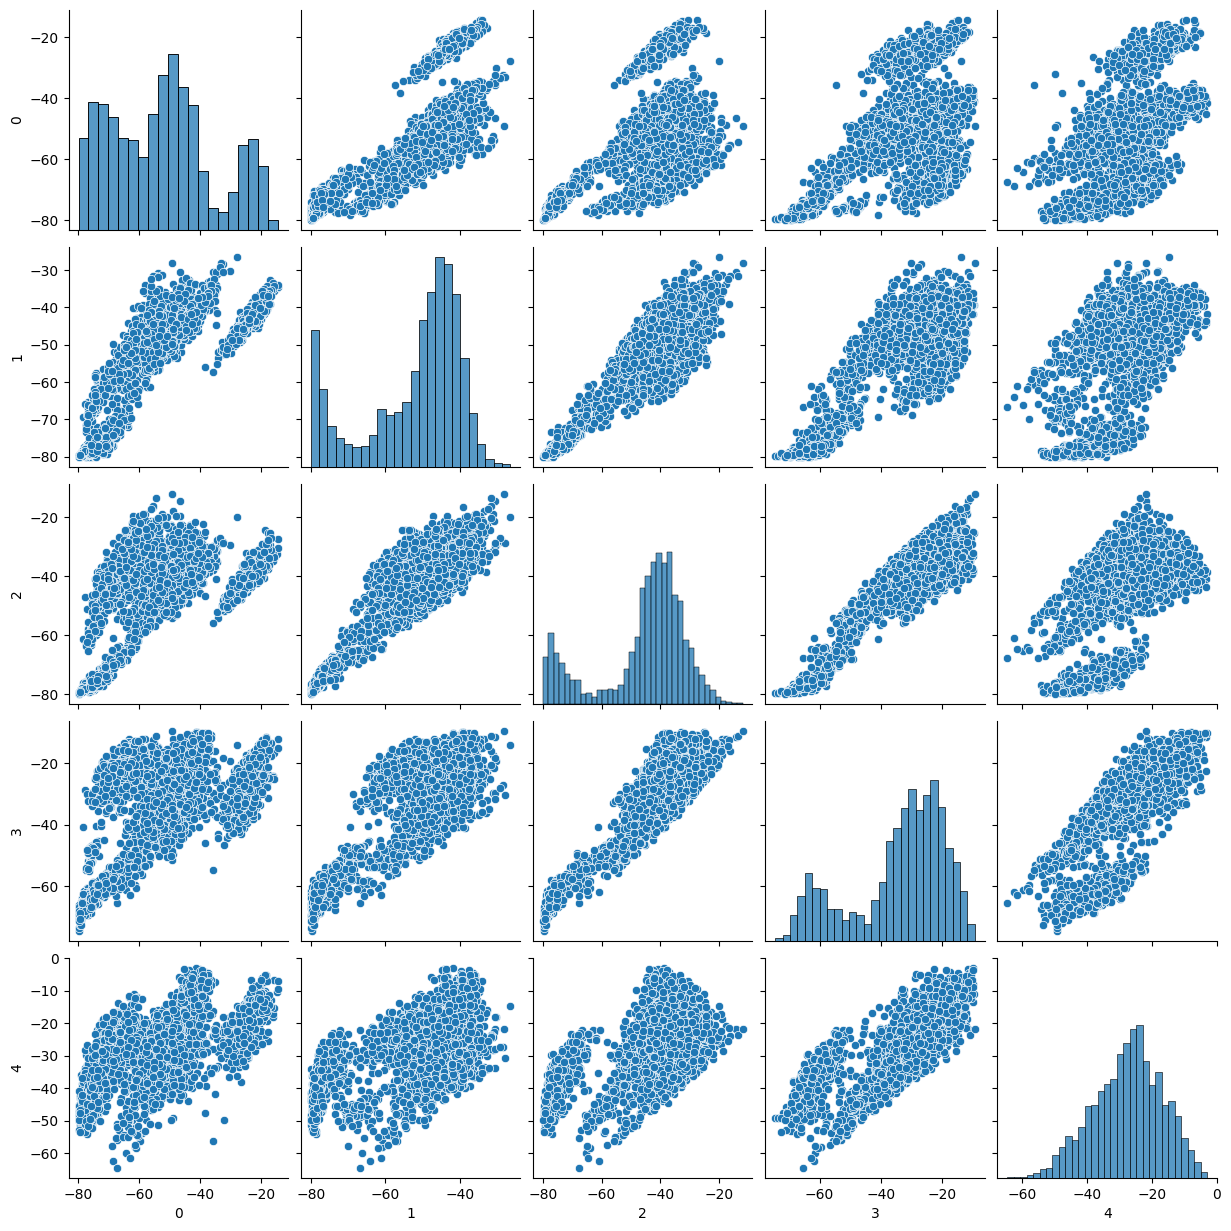

In [10]:

# Attempt visualization without dimensionality reduction
plt.figure(figsize=(8,6))
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], alpha=0.5)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Scatter Plot of Raw Features (Without Dimensionality Reduction)")
plt.show()

# Pair plot (Only using first 5 features)
sns.pairplot(df.iloc[:, :5])
plt.show()


### Why is dimensionality reduction important?
(*Document any challenges/errors from the above experiments.*)

**Dimensionality Reduction Importance:**

* Visualization Improvement:  High-dimensional data make scatter plots hard to interpret.

* Noise and Redundancy Reduction: which may cause unnecessary complexity, making clustering less effective.

* Avoiding the Curse of Dimensionality: Distance-based clustering struggled with too many dimensions, leading to poor separation.


**Challenges:**

* Messy Visualizations: Too many points and an extensive legend added to the confusion.

* Overlapping Data Points: many points overlap, making it difficult to distinguish clusters or patterns clearly.

* High Computational Load: Took time in loading and plotting the features, slowing down rendering and analysis.


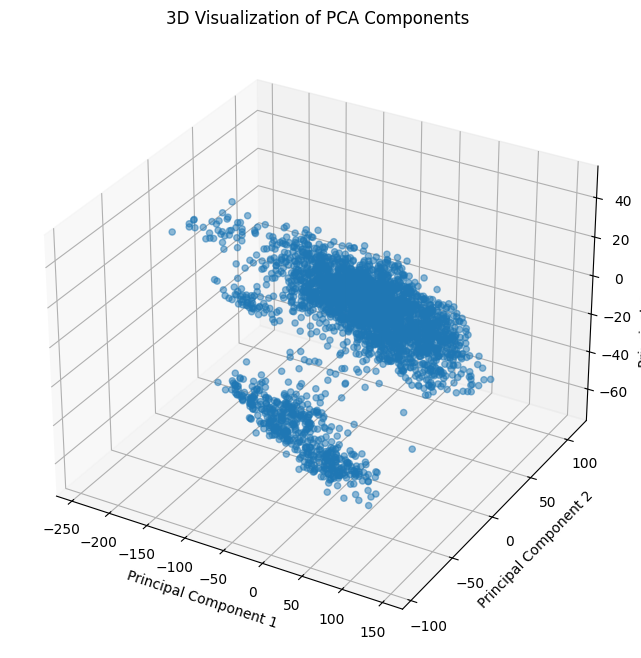

In [11]:

# Apply PCA (3 components)
pca = PCA(n_components=3)
features_pca = pca.fit_transform(features)

# 3D Visualization goes here
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(features_pca[:, 0], features_pca[:, 1], features_pca[:, 2], alpha=0.5)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D Visualization of PCA Components')
plt.show()





<function matplotlib.pyplot.show(close=None, block=None)>

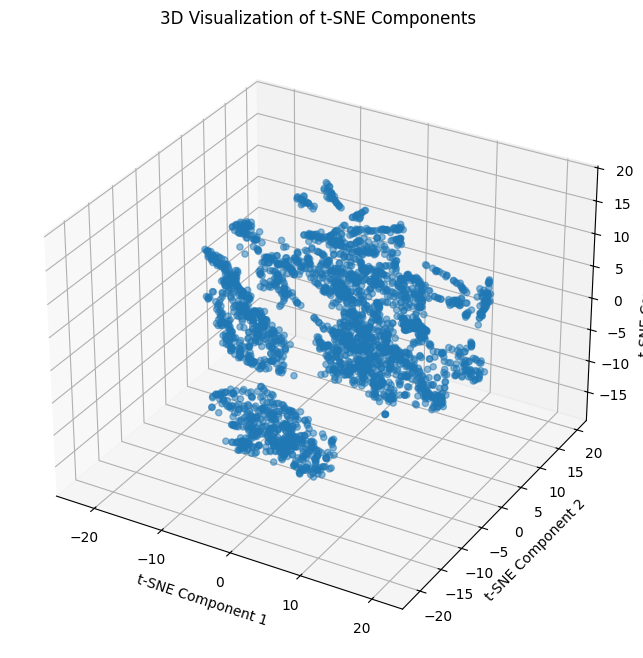

In [12]:
# Apply t-SNE (3 components)
tsne = TSNE(n_components=3, random_state=42)
features_tsne = tsne.fit_transform(features)

# 3D Visualization goes here
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(features_tsne[:, 0], features_tsne[:, 1], features_tsne[:, 2], alpha=0.5)
ax.set_xlabel('t-SNE Component 1')
ax.set_ylabel('t-SNE Component 2')
ax.set_zlabel('t-SNE Component 3')
ax.set_title('3D Visualization of t-SNE Components')
plt.show

 **Which method (PCA or t-SNE) provides better separability of clusters and why?**

Bassed on visualizations:

 **t-SNE Provides Better Separability:**

  * The **t-SNE** **visualization** showed distinct, **well-separated clusters**, indicating that it captures local structures effectively.

  * The **PCA visualization** had overlapping clusters, making separation less clear

Why does t-SNE perform better?
1. **Handles Non-Linear Patterns**: Unlike **PCA**, which is a linear transformation, **t-SNE is a non-linear dimensionality** reduction technique that captures complex relationships in data

2. **Preserves Local Relationship**s: **t-SNE** keeps similar points close together, maintaining meaningful neighborhood structures while **PCA** only captures overall variance, which may not reflect actual cluster distributions.

3. **Noise Reduction**: **t-SNE** filters out noise better, leading to tighter clusters in the visualization but **PCA** retains all variance, including irrelevant noise, which can blur cluster boundaries.

**Conclusion:**
**t-SNE** effectively captures complex, non-linear patterns that **PCA** cannot handle. This is why it **creates more distinct, well-separated clusters** in visualization.








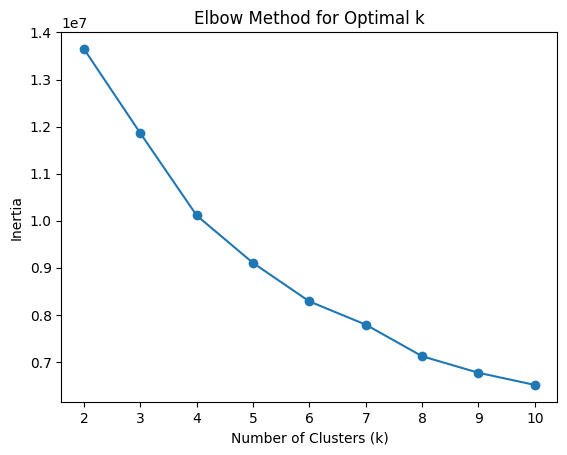

In [13]:

# Optimize number of clusters using Elbow Method
inertias = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features)
    inertias.append(kmeans.inertia_)

# Plot the graph
plt.plot(range(2, 11), inertias, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()



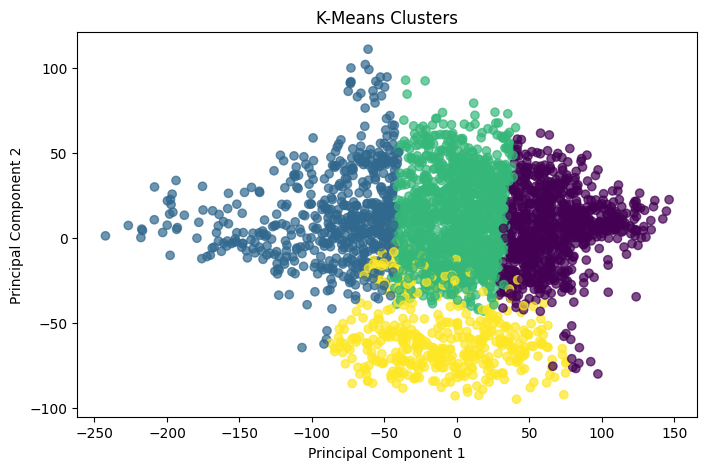

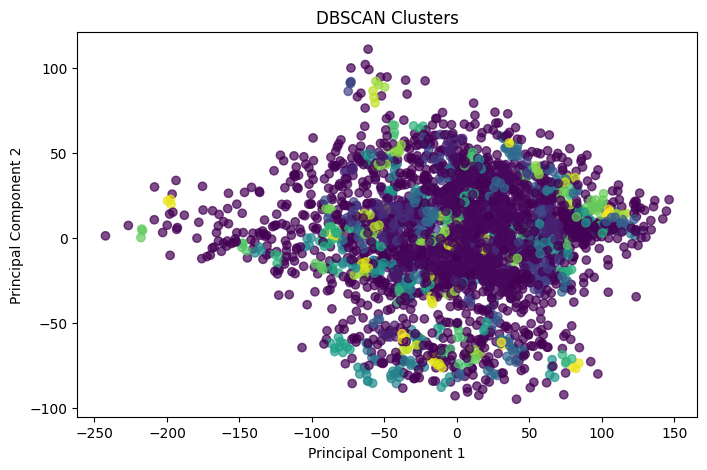

In [19]:

# Select optimal K based on elbow method (e.g., k=3)
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(features)

# Apply DBSCAN
dbscan = DBSCAN(eps=5, min_samples=3)
dbscan_labels = dbscan.fit_predict(features_pca)

# Scatter Plot for K-Means Clusters
plt.figure(figsize=(8, 5))
plt.scatter(features_pca[:, 0], features_pca[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("K-Means Clusters")
plt.show()

# Scatter Plot for DBSCAN Clusters
plt.figure(figsize=(8, 5))
plt.scatter(features_pca[:, 0], features_pca[:, 1], c=dbscan_labels, cmap='viridis', alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("DBSCAN Clusters")
plt.show()


In [20]:

# Evaluate clustering
kmeans_silhouette = silhouette_score(features_pca, kmeans_labels)
kmeans_db_index = davies_bouldin_score(features_pca, kmeans_labels)

if len(set(dbscan_labels)) > 1:
    dbscan_silhouette = silhouette_score(features_pca, dbscan_labels)
    dbscan_db_index = davies_bouldin_score(features_pca, dbscan_labels)
else:
    dbscan_silhouette = None
    dbscan_db_index = None

print(f"K-Means - Silhouette Score: {kmeans_silhouette:.4f}, Davies-Bouldin Index: {kmeans_db_index:.4f}")
if dbscan_silhouette is not None:
    print(f"DBSCAN - Silhouette Score: {dbscan_silhouette:.4f}, Davies-Bouldin Index: {dbscan_db_index:.4f}")
else:
    print("DBSCAN failed to form meaningful clusters.")


K-Means - Silhouette Score: 0.3205, Davies-Bouldin Index: 1.0319
DBSCAN - Silhouette Score: -0.3760, Davies-Bouldin Index: 1.5237


### Discuss the results (max 5 lines)
(*Compare K-Means and DBSCAN performance based on the outputs.*)

K-Means performed better, achieving a higher silhouette score and clearer cluster separation. It is faster and efficient but requires selecting the number of clusters (k). DBSCAN struggled, showing a negative silhouette score due to parameter sensitivity and poor cluster separation. In this case, K-Means was the better choice for clustering.

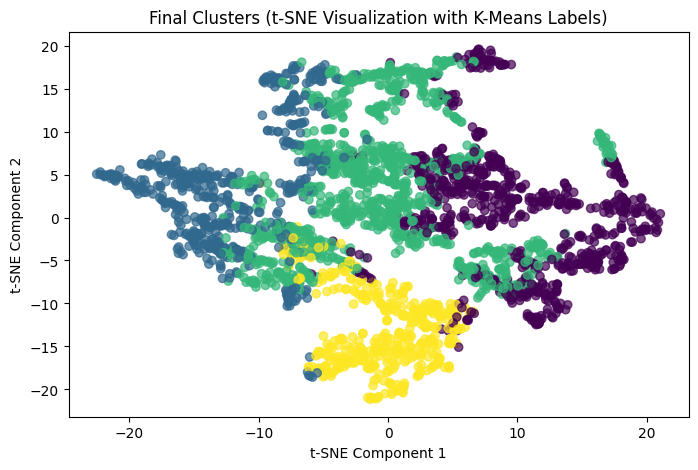

In [16]:

# Final visualization using t-SNE
plt.figure(figsize=(8, 5))
plt.scatter(features_tsne[:, 0], features_tsne[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.7)
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.title("Final Clusters (t-SNE Visualization with K-Means Labels)")
plt.show()


### Final Analysis
- Explain why dimensionality reduction helped (or didn't) in clustering.
- Justify why certain clustering methods worked better.
- Relate findings to real-world clustering challenges.

In real-world, K-Means is best for structured clustering, while DBSCAN excels at detecting anomalies and irregular patterns. Choosing the right method depends on data distribution, noise levels, and application needs to ensure accurate clustering and meaningful insights.